### Task 1 Data Preparation

In [2]:
# Import  Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df_Telco = pd.read_csv("E:\python\DATA_Science\Telco_Customer_Churn_Dataset  (3).csv")

print(df_Telco.head())
df_Telco.info()
df_Telco.describe()
df_Telco.columns

#  Initial data Exploration

# Check missing valuse
df_Telco.isnull().sum()

# Target variable distribution 
df_Telco['Churn'].value_counts()

# Handle Missing values

# Convert TotalCharges  to numeric because some values may be spaces
df_Telco['TotalCharges']=pd.to_numeric(df_Telco['TotalCharges'],errors="coerce")

# Fill missing values with median
df_Telco['TotalCharges'].fillna(df_Telco['TotalCharges'].median(),inplace=True)

# Drop Irrelevant  column
df_Telco.drop('customerID', axis=1 ,inplace=True)

# Encode Categorical  Variable
df_Telco = pd.get_dummies(df_Telco, drop_first=True)


# Separate Features and Target
X = df_Telco.drop('Churn_Yes', axis=1)
y = df_Telco['Churn_Yes']

# Train-Test Split
X_train,y_teat, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", y_test)

print("Data Preparation Completed Successfully!")

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

C:\Users\DELL\AppData\Local\Temp\ipykernel_8448\2195368614.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Telco['TotalCharges'].fillna(df_Telco['TotalCharges'].median(),inplace=True)


Training data shape: (5634, 30)
Testing data shape: 437     False
2280    False
2235    False
4460    False
3761    False
        ...  
5143    False
4439    False
3857    False
4758    False
5613    False
Name: Churn_Yes, Length: 1409, dtype: bool
Data Preparation Completed Successfully!


<!-- Task 2 -->

### Task 2 Exploratory Data Analysis

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


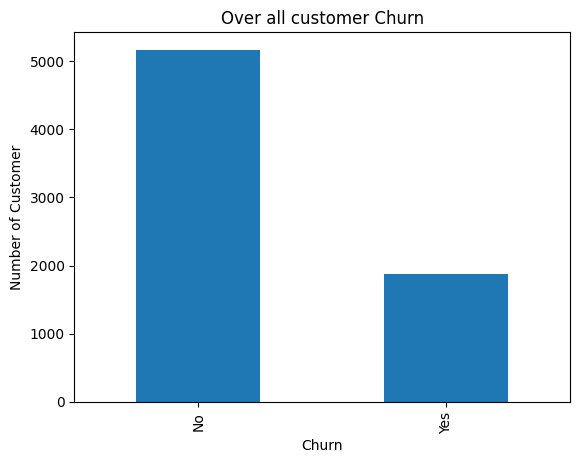

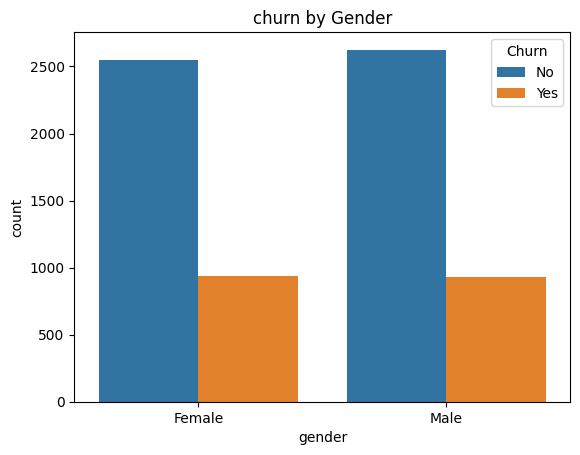

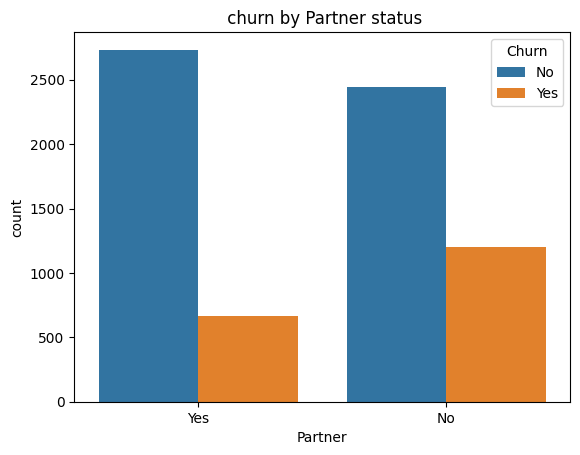

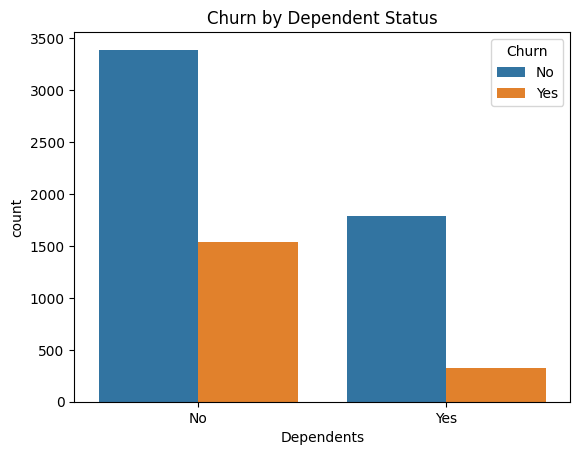

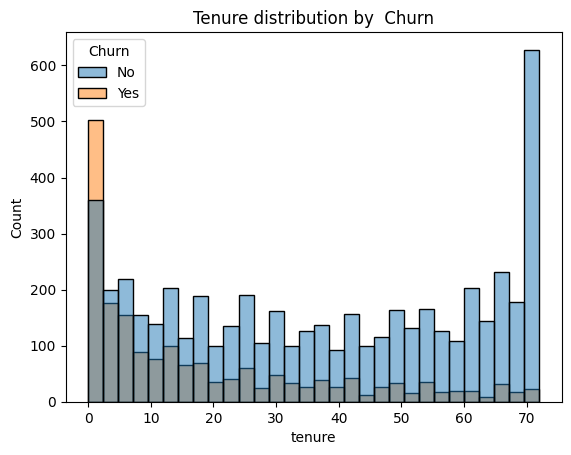

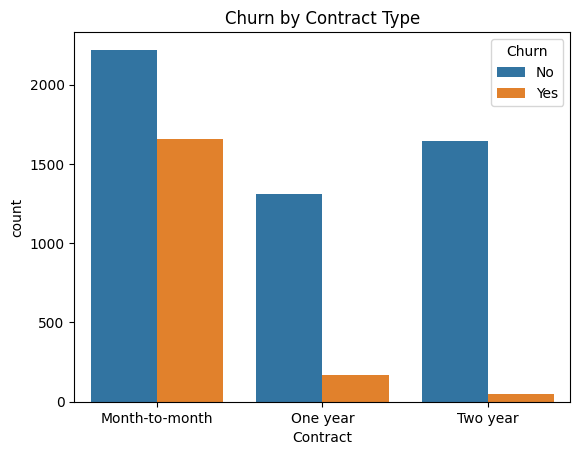

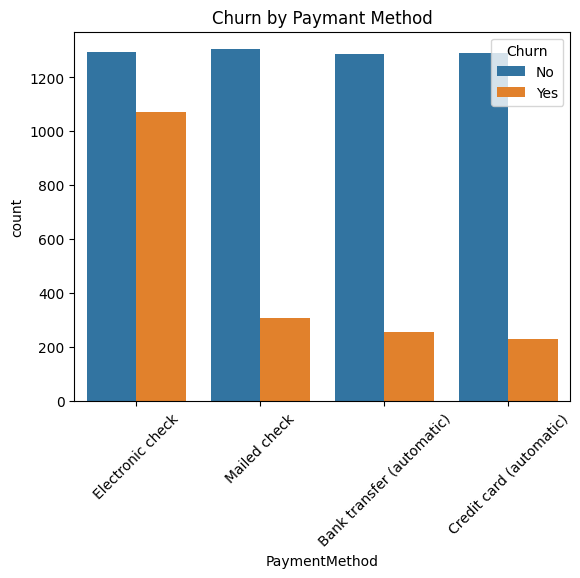

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("E:\python\DATA_Science\Telco_Customer_Churn_Dataset  (3).csv")

#  calculate Overall  churn rate
churn_rate  = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


df['Churn'].value_counts().plot(kind='bar')
plt.title('Over all customer Churn')
plt.xlabel("Churn")
plt.ylabel("Number of Customer")
plt.show()

# Customer distribution by gender, Partner & dependents
plt.figure()
sns.countplot(x='gender', hue='Churn', data= df)
plt.title('churn by Gender')
plt.show()

plt.Figure()
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title(' churn by Partner status')
plt.show()

plt.Figure()
sns.countplot(x='Dependents', hue='Churn', data= df)
plt.title('Churn by Dependent Status')
plt.show()


# Tenure Distribution & Churn Relationship

plt.figure()
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)
plt.title('Tenure distribution by  Churn')
plt.show()

# Churn Analysis by Contract Type
plt.Figure()
sns.countplot(x='Contract',hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

# Churn Analysis by Payment Method

sns.countplot(x='PaymentMethod', hue ='Churn', data = df)
plt.title('Churn by Paymant Method')
plt.xticks(rotation=45)
plt.show()

### Task :- 3  Customer Segmentation

C:\Users\DELL\AppData\Local\Temp\ipykernel_8448\1936655760.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df_seg.groupby('TenureSegment')['Churn'].value_counts(normalize=True) * 100
C:\Users\DELL\AppData\Local\Temp\ipykernel_8448\1936655760.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Charge_churn= df_seg.groupby('ChangeSegment')['Churn'].value_counts(normalize=True) * 100


 Churn rate by tenure segment:
TenureSegment  Churn
0-1 year       No       52.321839
               Yes      47.678161
1-2 year       No       71.289062
               Yes      28.710938
2-4 year       No       79.611041
               Yes      20.388959
4-6 years      No       90.486824
               Yes       9.513176
Name: proportion, dtype: float64
 Churn rate  by monthly charge Segment: 
ChangeSegment    Churn
Low spenders     No       89.106628
                 Yes      10.893372
Medium spenders  No       76.057971
                 Yes      23.942029
High spenders    No       64.638571
                 Yes      35.361429
Name: proportion, dtype: float64


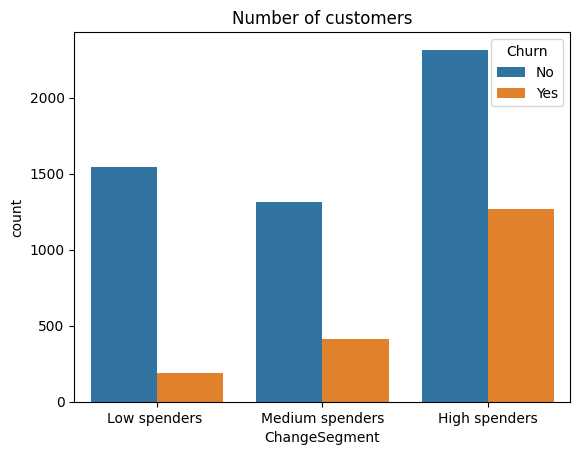

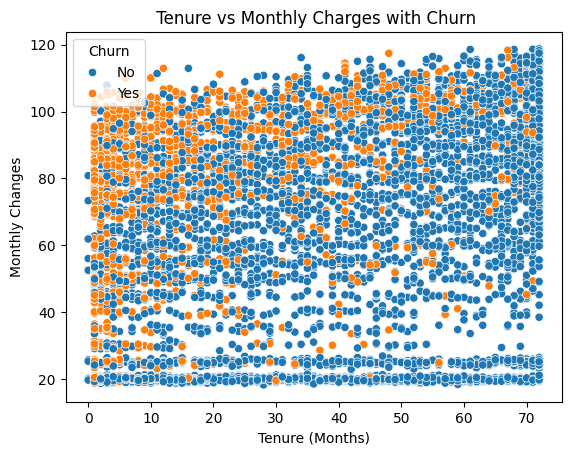

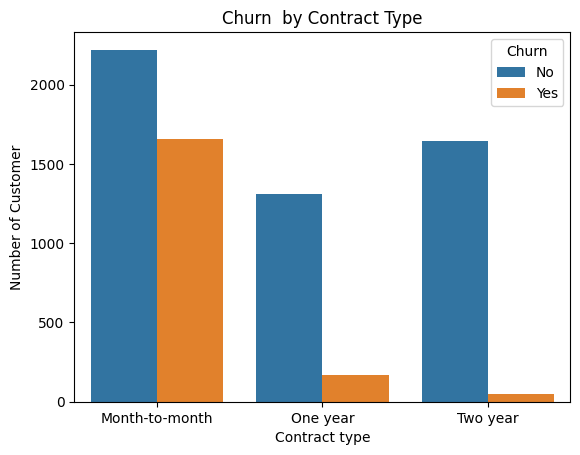

(3583, 23)
(3833, 23)
(0, 23)
(1869, 23)

Number of High-value  customer at risk: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureSegment,ChangeSegment


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_seg = pd.read_csv("E:\python\DATA_Science\Telco_Customer_Churn_Dataset  (3).csv")

# 1. Customer segmentation by Tenure
# Tenure = Number of  months customer stayed  with the company
df_seg['TenureSegment'] = pd.cut(df_seg['tenure'], 
    bins=[0, 12, 24, 48, 72],
        labels=['0-1 year','1-2 year','2-4 year','4-6 years']
)

# Calculate churn rate  within each  tenure segment 
tenure_churn = df_seg.groupby('TenureSegment')['Churn'].value_counts(normalize=True) * 100

print(" Churn rate by tenure segment:")
print(tenure_churn)


# 2. Cusromer segmentation  by monthly charges
# Monthly charges  represent  how mach a  customer  pays per month
#  customers are grouped into low, mediam, and high spenders

df_seg['ChangeSegment'] = pd.cut(df_seg['MonthlyCharges'],
            bins=[0, 35, 70, 120],  # Charge ranges
            labels=['Low spenders ', 'Medium spenders', 'High spenders']    
)

# calculate churn  rate  within  each  charge  segment
Charge_churn= df_seg.groupby('ChangeSegment')['Churn'].value_counts(normalize=True) * 100

print(" Churn rate  by monthly charge Segment: ")
print(Charge_churn)

plt.Figure(figsize=(8,5))
sns.countplot(x='ChangeSegment', hue='Churn', data=df_seg)
plt.title('Customer churn by monthly spending')
plt.title('Change Segment')
plt.title("Number of customers")
plt.show()

#  Combined Tenure and Monthly Charges
plt.Figure(figsize=(8,5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data = df_seg)
plt.title(" Tenure vs Monthly Charges with Churn")
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Changes')
plt.show()

# 3. Churn analysis  by  Contract type

#  contract type  strongly affects  customer  churn
sns.countplot(x='Contract', hue='Churn', data=df_seg)
plt.title("Churn  by Contract Type")
plt.xlabel("Contract type")
plt.ylabel("Number of Customer")
plt.show()

# Identify  High-value  Customers  at Rick of Churn 
# High-value  Customers:

High_value_risk = df_seg[
    (df_seg['MonthlyCharges']>70) &                 # High-paying customers
    (df_seg['tenure'] >24) &                        # Long-trem customers
    (df_seg['Contract'] == 'Month-to-Month') &      # Flexible Contract
    (df_seg['Churn'] == 'Yes')                      # Churn customers
]
# High monthly charges
print(df_seg[df_seg['MonthlyCharges']> 70].shape)

# Long tenure
print(df_seg[df_seg['tenure'] > 24].shape)

#  Month-to-Month Cantract
print(df_seg[df_seg['Contract'] == 'Month-to-Month'].shape)

# Churned Customers
print(df_seg[df_seg['Churn'] == 'Yes'].shape)


#  Display number of high-value customer  at risk
print("\nNumber of High-value  customer at risk:", High_value_risk.shape[0])



High_value_risk.head()



### Task:-4 Churn Prediction Model

In [5]:
# Data Handling
import pandas as pd
import numpy as np

# Model Selection & Evaluation 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train-Test Split Dataset  
X_train ,X_test,y_train,y_test =train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# Initialize model logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train,y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
# Evalution
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test,y_pred_lr))

# Initialize model Random Forest Classifier
rf =RandomForestClassifier(random_state=42)
# Train model
rf.fit(X_train,y_train)
# predict
y_pred_rf=rf.predict(X_test)
# Evaluate
print("Random Forest Accuracy :",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

from xgboost import XGBClassifier
# Initailize model X Gradient Boost Classifier
xgb = XGBClassifier(
    scale_pos_weight=3,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("X Gradient Boosting Accuracy:",accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


from sklearn.ensemble import GradientBoostingClassifier
# Initailize model Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy :", accuracy_score(y_test,y_pred_gb))
print(classification_report(y_test, y_pred_gb))


# Feature Importance  from Random Forest
feature_importance = pd.Series(
    rf.feature_importances_,
    index = X.columns
).sort_values(ascending=False)

# view  top 10 important feature
print(feature_importance.head())

# Parameter grid
param_grid = {
    'n_estimators':[100, 200],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2, 5]
}
from sklearn.model_selection import GridSearchCV

# Gridsearch
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring ='f1',
    n_jobs=-1
)
# Traiin
grid.fit(X_train,y_train)
# Best model
best_rf = grid.best_estimator_
# predict
y_pred_best = best_rf.predict(X_test)
# Evaluate
print("Tuned Random Forest Accuracy:", accuracy_score(y_test,y_pred_best))
print(classification_report(y_test,y_pred_best))


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8041163946061036
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1035
        True       0.66      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Random Forest Accuracy : 0.7863733144073811
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1035
        True       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.77      0.79      0.78      1409

X Gradient Boosting Accuracy: 0.758694109297374
              precision    recall  f1-score   support

       False       0.87      0.79      0.83      1035
        True       0.54      0.68      0.60       374

    accuracy                           0.

### Task:-5 Model Evaluation and Interpretation

XGBoost Accuracy: 0.758694109297374
              precision    recall  f1-score   support

       False       0.87      0.79      0.83      1035
        True       0.54      0.68      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



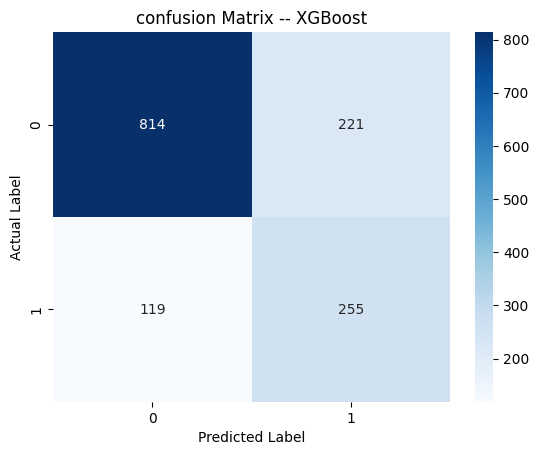

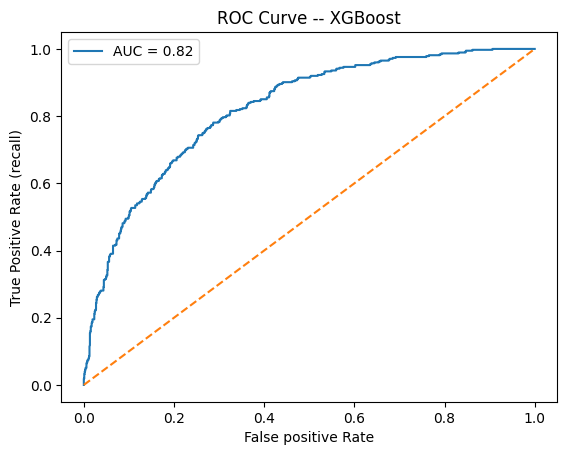

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
# predict churn labels on test data
y_pred_xgb = xgb.predict(X_test)

# Calculate Acccuracy
Accuracy = accuracy_score(y_test,y_pred_xgb)
# Modelo Accuracy
print("XGBoost Accuracy:", Accuracy)
print(classification_report(y_test,y_pred_xgb))


# Confusion matrix Understand Error
# Generate Confusion matrix
cm = confusion_matrix(y_test,y_pred_xgb)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix -- XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Create feature Importance   series
Feature_importance_xgb = pd.Series(
    xgb.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

Feature_importance_xgb.head(10)


# get churn probability scores
y_pred_xgb = xgb.predict_proba(X_test)[:,1]

# calculate  false Positive rate and  True Position rate
fpr, tpr, thershoulds = roc_curve(y_test,y_pred_xgb)

# Calculate AUC Score
roc_auc = auc(fpr,tpr)

# plot ROC Curve
plt.plot(fpr,tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle= "--")   # Random classifier line
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate (recall)")
plt.title("ROC Curve -- XGBoost")
plt.legend()
plt.show() 

